In [21]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier as xgc
train_set = pd.read_csv('adult.data', header = None)

test_set = pd.read_csv('adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex','capital_gain','capital_loss','hours_per_week','native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [22]:
train_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
print("Train dataset shape: ",train_set.shape)

Train dataset shape:  (32561, 15)


In [24]:
test_set.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [25]:
print("Test dataset shape: ",test_set.shape)

Test dataset shape:  (16281, 15)


In [26]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [27]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
train_set.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

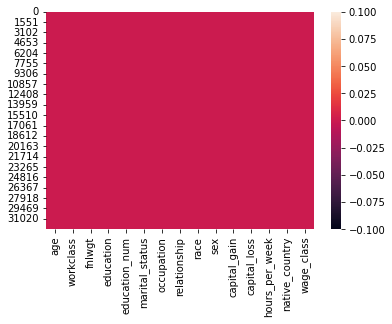

In [29]:
sns.heatmap(train_set.isnull())

In [30]:
train_set['workclass'] = train_set['workclass'].replace(' ?',np.nan)
train_set['occupation'] = train_set['occupation'].replace(' ?',np.nan)
train_set['native_country'] = train_set['native_country'].replace(' ?',np.nan)

In [31]:
train_set.isin([' ?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

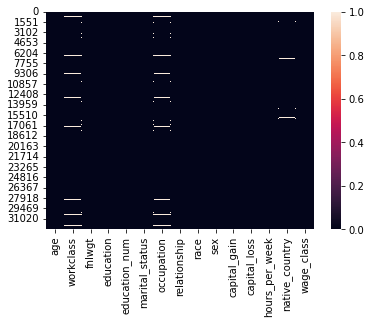

In [32]:
sns.heatmap(train_set.isnull())

In [33]:
train_set = train_set.dropna()
train_set.shape

(30162, 15)

In [34]:
train_set.capital_gain.value_counts()

0        27624
15024      337
7688       270
7298       240
99999      148
         ...  
401          1
22040        1
4931         1
1455         1
1639         1
Name: capital_gain, Length: 118, dtype: int64

In [35]:
train_set.capital_loss.value_counts()

0       28735
1902      194
1977      162
1887      155
1848       50
        ...  
419         1
1411        1
1539        1
2472        1
2467        1
Name: capital_loss, Length: 90, dtype: int64

In [36]:
train_set.drop(['capital_gain','capital_loss'],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
train_set.shape

(30162, 13)

In [38]:
train_set.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [39]:
train_set['outcome'] = train_set.wage_class.map({' <=50K':0,' >50K':1})

In [40]:
train_set.drop(['wage_class'],inplace=True,axis=1)

In [41]:
train_set.head(1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,outcome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0


In [42]:
train_set.groupby('race')['outcome'].mean()

race
 Amer-Indian-Eskimo    0.118881
 Asian-Pac-Islander    0.277095
 Black                 0.129925
 Other                 0.090909
 White                 0.263718
Name: outcome, dtype: float64

In [43]:
train_set.groupby('relationship')['outcome'].mean().sort_values(ascending=False)
train_set['relationship'] = train_set['relationship'].replace(['Unmarried','other-relative','Own-child'],np.nan)

In [44]:
train_set.groupby('sex')['outcome'].mean()

sex
 Female    0.113678
 Male      0.313837
Name: outcome, dtype: float64

In [45]:
train_set.groupby('occupation')['outcome'].mean().sort_values(ascending=False)
train_set['occupation'] = train_set['occupation'].replace([' Handlers-cleaners',' Other-service',' Priv-hoouse-serv'],np.nan)

In [46]:
train_set.groupby('workclass')['outcome'].mean().sort_values(ascending=False)
train_set['workclass'] = train_set['workclass'].replace([' Without-pay'],np.nan)

In [47]:
train_set.groupby('education')['outcome'].mean().sort_values( ascending=False)
train_set['education'] = train_set['education'].replace([' 12th',' 10th',' 7th-8th',' 11th',' 9th',' 5th-6th',' 1st-4th','Preschool'],np.nan)

In [48]:
train_set.groupby('marital_status')['outcome'].mean().sort_values(ascending=False)
train_set['marital_status'] = train_set['marital_status'].replace([' Widowed',' Married-spouse-absent',' Never-married',' Separated'],np.nan)

In [49]:
train_set.drop(['race','hours_per_week'],inplace=True,axis=1)

In [50]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,native_country,outcome
0,39,State-gov,77516,Bachelors,13,NaN,Adm-clerical,Not-in-family,Male,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,NaN,Not-in-family,Male,United-States,0
3,53,Private,234721,NaN,7,Married-civ-spouse,NaN,Husband,Male,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,United-States,1
32558,58,Private,151910,HS-grad,9,NaN,Adm-clerical,Unmarried,Female,United-States,0
32559,22,Private,201490,HS-grad,9,NaN,Adm-clerical,Own-child,Male,United-States,0


In [51]:
train_set.isna().sum()

age                   0
workclass            14
fnlwgt                0
education          3696
education_num         0
marital_status    11862
occupation         4562
relationship          0
sex                   0
native_country        0
outcome               0
dtype: int64

In [52]:
train_set = train_set.dropna()
train_set.shape

(15030, 11)

In [53]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,native_country,outcome
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,United-States,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Male,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,Male,United-States,0
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Male,United-States,1
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,United-States,1


In [54]:
train_set['Male'] = (pd.get_dummies(train_set['sex'],drop_first=True))
train_set=train_set.join(pd.get_dummies(train_set['relationship'],drop_first=True))
train_set=train_set.join(pd.get_dummies(train_set['occupation'],drop_first=True))
train_set=train_set.join(pd.get_dummies(train_set['workclass'],drop_first=True))
train_set=train_set.join(pd.get_dummies(train_set['education'],drop_first=True))
train_set=train_set.join(pd.get_dummies(train_set['marital_status'],drop_first=True))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
train_set.drop(['native_country','sex','relationship','occupation','workclass','education','marital_status'],axis=1,inplace=True)

In [56]:
train_set.head()

,age,fnlwgt,education_num,outcome,Male,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Machine-op-inspct,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Married-AF-spouse,Married-civ-spouse
1,50,83311,13,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,28,338409,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
5,37,284582,14,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
7,52,209642,9,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
9,42,159449,13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [92]:
X = train_set.drop('outcome',axis=1)
y = train_set.outcome


#Test Data


In [65]:
test_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [66]:
train_set.columns

Index(['age', 'fnlwgt', 'education_num', 'outcome', 'Male', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife', ' Armed-Forces',
       ' Craft-repair', ' Exec-managerial', ' Farming-fishing',
       ' Machine-op-inspct', ' Priv-house-serv', ' Prof-specialty',
       ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving',
       ' Local-gov', ' Private', ' Self-emp-inc', ' Self-emp-not-inc',
       ' State-gov', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad',
       ' Masters', ' Preschool', ' Prof-school', ' Some-college',
       ' Married-AF-spouse', ' Married-civ-spouse'],
      dtype='object')

In [67]:
test_set.isin([' ?']).sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
wage_class          0
dtype: int64

In [68]:
test_set = test_set.replace(' ?',np.nan)

In [69]:
test_set.dropna(inplace=True)

In [70]:
test_set.drop(['capital_gain','capital_loss'],inplace=True,axis=1)

In [71]:
test_set['outcome'] = test_set.wage_class.map({' <=50K.':0,' >50K.':1})
 

In [72]:
test_set.drop(['wage_class'],inplace=True,axis=1)

In [73]:
test_set['relationship'] = test_set['relationship'].replace(['Unmarried','other-relative','Own-child'],np.nan)

In [74]:
test_set['occupation'] = test_set['occupation'].replace([' Handlers-cleaners',' Other-service',' Priv-hoouse-serv'],np.nan)

In [75]:
test_set['workclass'] = test_set['workclass'].replace([' Without-pay'],np.nan)
test_set['education'] = test_set['education'].replace([' 12th',' 10th',' 7th-8th',' 11th',' 9th',' 5th-6th',' 1st-4th','Preschool'],np.nan)
test_set['marital_status'] = test_set['marital_status'].replace([' Widowed',' Married-spouse-absent',' Never-married',' Separated'],np.nan)

In [76]:
test_set.drop(['race','hours_per_week'],inplace=True,axis=1)

In [77]:
test_set['marital_status'].value_counts()

 Married-civ-spouse    6990
 Divorced              2083
 Married-AF-spouse       11
Name: marital_status, dtype: int64

In [78]:
test_set.fillna(value={'marital_status':"Married-civ-spouce"},inplace=True)

In [79]:
test_set.dropna(inplace=True)

In [80]:
test_set['Male'] = (pd.get_dummies(test_set['sex'],drop_first=True))
test_set=test_set.join(pd.get_dummies(test_set['relationship'],drop_first=True))
test_set=test_set.join(pd.get_dummies(test_set['occupation'],drop_first=True))
test_set=test_set.join(pd.get_dummies(test_set['workclass'],drop_first=True))
test_set=test_set.join(pd.get_dummies(test_set['education'],drop_first=True))
test_set=test_set.join(pd.get_dummies(test_set['marital_status'],drop_first=True))

In [81]:
test_set.drop(['native_country','sex','relationship','occupation','workclass','education','marital_status'],axis=1,inplace=True)

In [82]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor(verbose=3,random_state=40)
selection.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=40, verbose=3, warm_start=False)

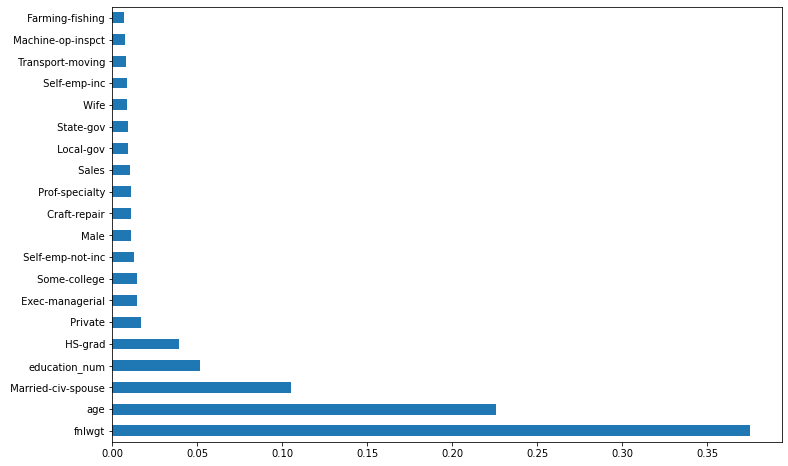

In [83]:
plt.figure(figsize=(12,8))
feat_imp = pd.Series(selection.feature_importances_,index = X.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

In [84]:
X.drop(labels=[' Doctorate',' Not-in-family',' Masters',' Protective-serv',' Tech-support',' Assoc-voc',' Bachelors'],axis=1,inplace=True)
test_set.drop(labels=[' Doctorate',' Not-in-family',' Masters',' Protective-serv',' Tech-support',' Assoc-voc',' Armed-Forces',' Bachelors'],axis=1,inplace=True)


In [85]:
XGBmodel = xgc()
XGBmodel.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [86]:
y_predict = XGBmodel.predict(X)
accuracy_score(y,y_predict)

0.7442448436460413

In [87]:
from sklearn.model_selection import GridSearchCV
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}
grid= GridSearchCV(XGBmodel,param_grid, verbose=3)
grid.fit(X,y)
grid.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.696, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.710, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.712, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.718, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.700, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.720, total=   0.5s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.726, total=   0.5s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.742, total=   0.5s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.739, total=   0.5s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.722, total=   0.5s
[CV]  l

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 18.1min finished


{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}

In [88]:
new_model = xgc(learning_rate =  1, max_depth =  5, n_estimators =  50)
new_model.fit(X,y)
y_new_predict = new_model.predict(X)
accuracy_score(y,y_new_predict)


0.8128409846972722